In [ ]:
import cv2
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/driver')

Drive already mounted at /content/driver; to attempt to forcibly remount, call drive.mount("/content/driver", force_remount=True).


In [ ]:
img = cv2.imread('/content/text.jpg')

In [ ]:
from google.colab.patches import cv2_imshow

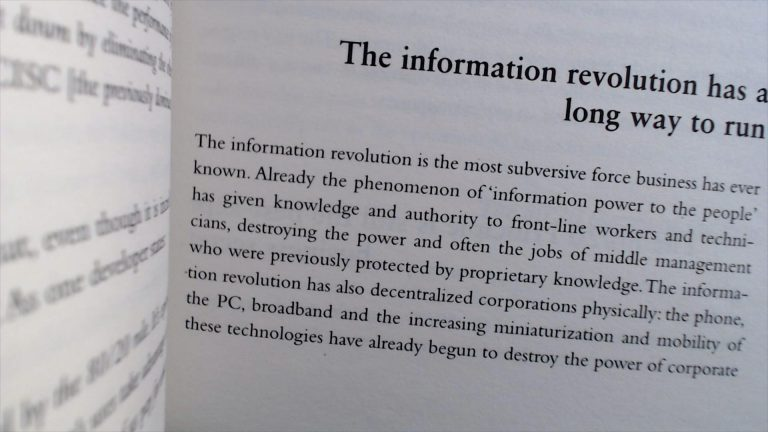

In [ ]:
cv2_imshow(img)

In [ ]:
print('img shape:', img.shape)

img shape: (432, 768, 3)


In [ ]:
h, w, _ = img.shape

In [ ]:
# cut the image
roi = img[0:h, 150:w]

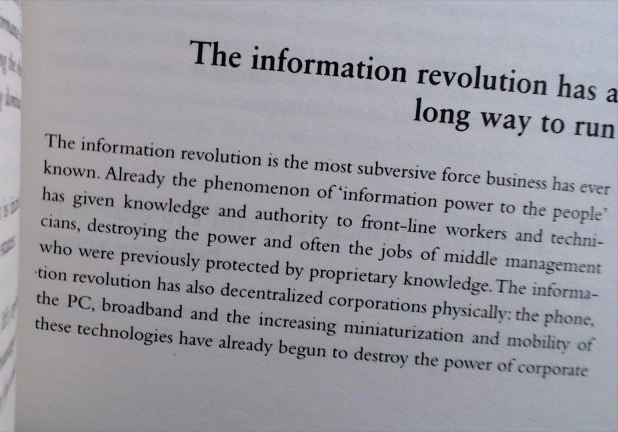

In [ ]:
cv2_imshow(roi)

In [ ]:
# Using free api 
# https://ocr.space/OCRAPI

In [ ]:
import requests
import io

In [ ]:
#ocr
url_api = 'https://api.ocr.space/parse/image'
key = ''
_, compressedimage = cv2.imencode('.jpg', roi, [1, 90])
file_bytes = io.BytesIO(compressedimage)

result = requests.post(url_api, files = {'/content/text.jpg': file_bytes}, data = {'apikey':key})


In [ ]:
result = result.content.decode()
type(result)

str

In [ ]:
# Change to jsonformat
import json
result = json.loads(result)

In [ ]:
result

{'IsErroredOnProcessing': False,
 'OCRExitCode': 1,
 'ParsedResults': [{'ErrorDetails': '',
   'ErrorMessage': '',
   'FileParseExitCode': 1,
   'ParsedText': "The information revolution has\r\nlong way to run\r\nThe information revolution is the most subversive force business has ever\r\nknown. Already the phenomenon of 'information power to the people'\r\nhas given knowledge and authority to front-line workers and techni-\r\ncians, destroying the power and often the jobs of middle management\r\nwho were previously protected by proprietary knowledge. The intörma-\r\ntion revolution has also decentralized corporations physically: the phone.\r\nthe PC, broadband and the increasing miniaturization and mobility Ot-\r\nthese technologies have already begun to destroy the power of corporate\r\n",
   'TextOrientation': '0',
   'TextOverlay': {'HasOverlay': False,
    'Lines': [],
    'Message': 'Text overlay is not provided as it is not requested'}}],
 'ProcessingTimeInMilliseconds': '390',


In [ ]:
text_detected = result.get('ParsedResults')[0].get('ParsedText')
print(text_detected)

The information revolution has
long way to run
The information revolution is the most subversive force business has ever
known. Already the phenomenon of 'information power to the people'
has given knowledge and authority to front-line workers and techni-
cians, destroying the power and often the jobs of middle management
who were previously protected by proprietary knowledge. The intörma-
tion revolution has also decentralized corporations physically: the phone.
the PC, broadband and the increasing miniaturization and mobility Ot-
these technologies have already begun to destroy the power of corporate

